# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [2]:
import pandas as pd
df = pd.read_csv("earthquake_data2.csv")
df

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.0,12/11/2022 7:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,"XYZ, Fiji",Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11/11/2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.6,9/11/2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,"xyz, xyz",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,"M 7.7 - 28 km SSW of Puerto El Triunfo, El Sal...",7.7,13-01-2001 17:33,0,8,NaN,0,912,us,427,0.000,0.0,mwc,60.000,13.0490,-88.660,"Puerto El Triunfo, El Salvador",NaN,NaN
778,"M 6.9 - 47 km S of Old Harbor, Alaska",6.9,10/1/2001 16:02,5,7,NaN,0,745,ak,0,0.000,0.0,mw,36.400,56.7744,-153.281,"Old Harbor, Alaska-USA",North America,NaN
779,"M 7.1 - 16 km NE of Port-Olry, Vanuatu",7.1,9/1/2001 16:49,0,7,NaN,0,776,us,372,0.000,0.0,mwb,103.000,-14.9280,167.170,"Port-Olry, Vanuatu",NaN,Vanuatu
780,"M 6.8 - Mindanao, Philippines",6.8,1/1/2001 8:54,0,5,NaN,0,711,us,64,0.000,0.0,mwc,33.000,6.6310,126.899,"Mindanao, Philippines",NaN,NaN


## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

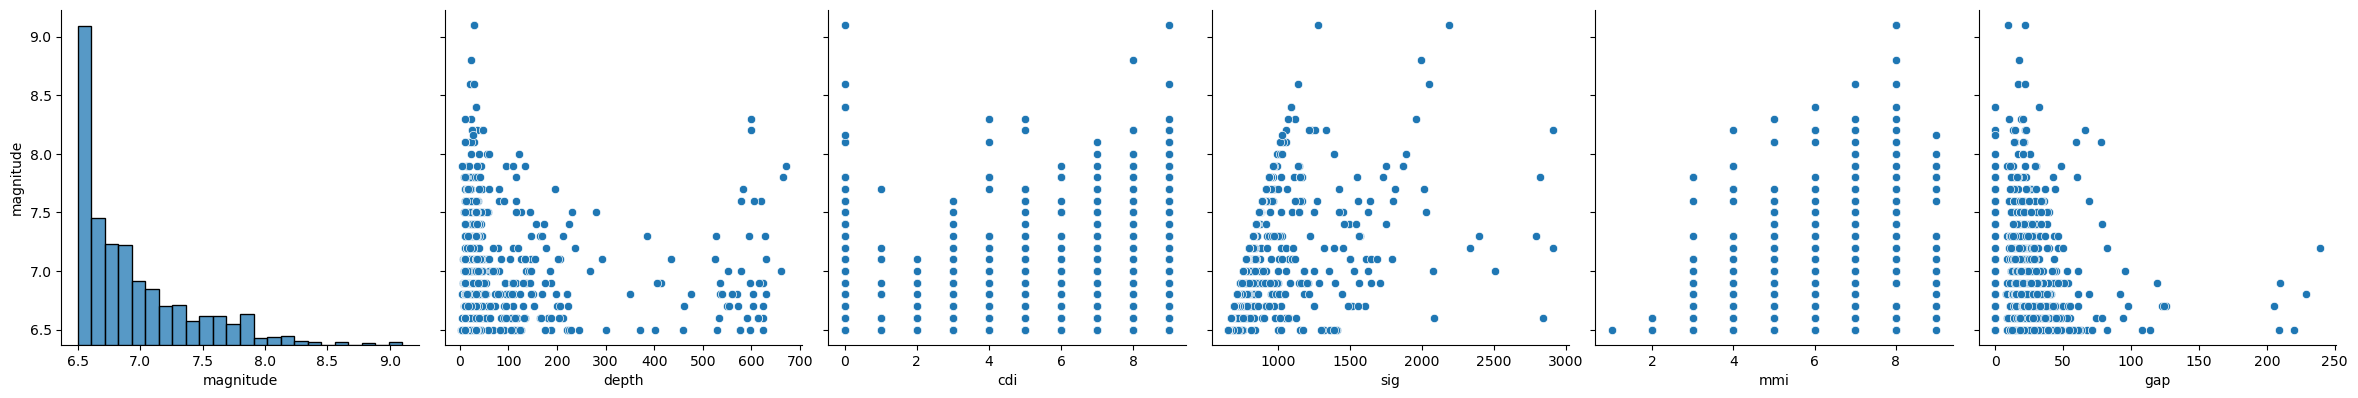

In [50]:
import matplotlib.pyplot as plt 
import seaborn as sns

# Using pairplot we'll visualize the data for correlation
sns.pairplot(df, x_vars=['magnitude', 'depth','cdi', 'sig', 'mmi', 'gap',], 
             y_vars='magnitude', height=4, aspect=1, kind='scatter')
plt.show()

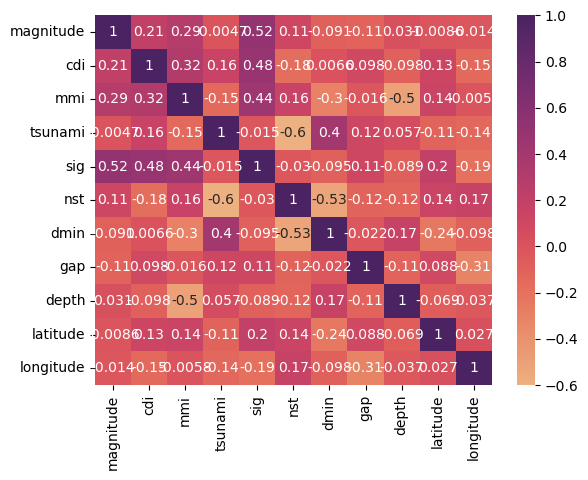

In [13]:
# Visualizing the data using heatmap
sns.heatmap(df.corr(), cmap="flare", annot = True)
plt.show()

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [34]:
# Creating X and y
X = df['sig']
y = df['magnitude']

# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

# Take a look at the train dataset
X_train , y_train


(358    1211
 637     703
 328     741
 392     691
 174    1392
        ... 
 578     672
 53     2331
 350     677
 79      739
 520    1360
 Name: sig, Length: 547, dtype: int64,
 358    6.8
 637    6.6
 328    6.8
 392    6.7
 174    6.9
       ... 
 578    6.6
 53     7.2
 350    6.6
 79     6.9
 520    6.5
 Name: magnitude, Length: 547, dtype: float64)

In [15]:
# Importing Statsmodels.api library from Stamodel package, to build linear regression.
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fitting the resgression line using 'OLS'-- Ordinary Least Square
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const    6.231982
sig      0.000812
dtype: float64

In [16]:
# Performing a summary of linear regression
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              magnitude   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     230.7
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           1.04e-43
Time:                        19:37:37   Log-Likelihood:                -234.38
No. Observations:                 547   AIC:                             472.8
Df Residuals:                     545   BIC:                             481.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2320      0.048    128.526      0.000       6.137       6.327
sig            0.0008   5.34e-05     15.189      0.000       0.001       0.001
==============================================================================
Omnibus:                       92.183   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.180
Skew:                           0.856   Prob(JB):                     2.32e-51
Kurtosis:                       5.702   Cond. No.                     2.76e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

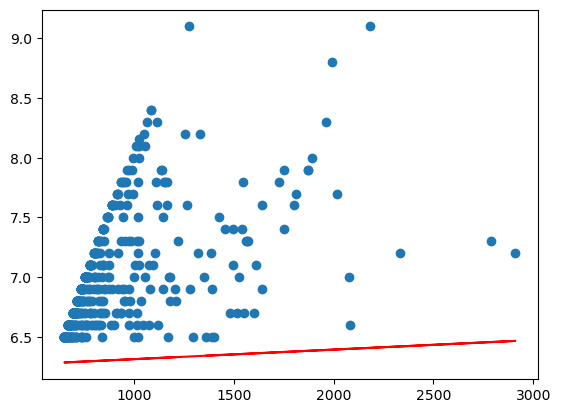

In [25]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.2320 + 0.00008*X_train, 'r')
plt.show()

## Error Terms

Finally, plot your error terms!

<Figure size 640x480 with 0 Axes>

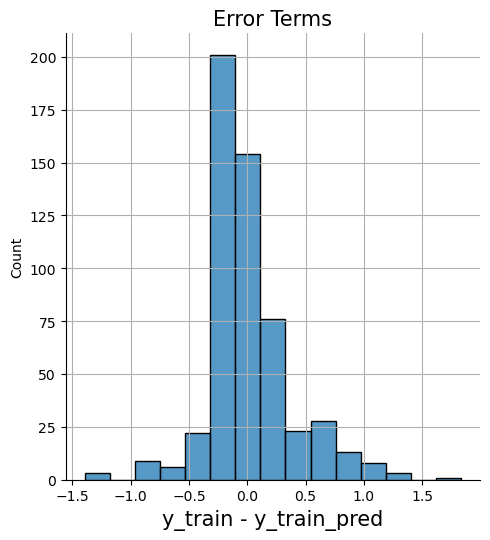

In [46]:
# Predicting y_value using traing data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

# Plotting the histogram using the residual values
fig = plt.figure()
sns.displot(res, bins = 15)
plt.grid(True)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.297
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset?   Yes it was becuase it showed how the magnitude and sig have very little correlation.
3. Was your plot of the error terms a bell curve? Not really, it is skewed towards the right. 